We begin by importing the necessary Python libraries:

- `pandas`: for loading and working with tabular data
- `numpy`: for numerical operations like mean and array manipulation
- `matplotlib.pyplot`: for creating visualizations (scatter plot and regression line)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We load the Advertising dataset from a public URL and extract only the `TV` and `sales` columns. These represent:

- `TV`: Advertising budget spent on television
- `sales`: Resulting product sales

This dataset will be used to explore the linear relationship between TV advertising and sales.


In [16]:
data = pd.read_csv("https://www.statlearning.com/s/Advertising.csv")
tv=data["TV"]
sales=data["sales"]

We calculate the **slope (m)** and **intercept (c)** of the regression line using the **Least Squares method**.

This formula minimizes the total squared difference between the actual data points and the values predicted by the line.  
The resulting equation of the line is:

$$
\text{Sales} = m \cdot \text{TV} + c
$$


In [17]:
mean_x=np.mean(tv)
mean_y=np.mean(sales)
n=len(tv)
num,deno=0,0
for i in range(n):
  num+=(tv[i]-mean_x)*(sales[i]-mean_y)
  deno+=(tv[i]-mean_x)**2
m=num/deno
c=mean_y-(m*mean_x)
print("Slope:",m,"Intercept:",c)



Slope: 0.04753664043301969 Intercept: 7.032593549127704


We generate a smooth set of x-values using `linspace()` and compute the corresponding predicted y-values using our regression equation.

We then plot:
- The regression line (in blue)
- The original data points (in red)

This helps us visualize how well the line fits the data.


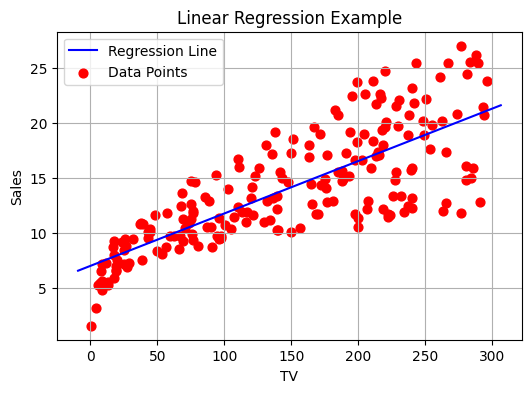

In [18]:
min_x = np.min(tv)-10
max_x = np.max(tv)+10
x = np.linspace(min_x, max_x, 1000)
y = c + m * x

plt.figure(figsize=(6, 4))
plt.plot(x, y, color="blue", label="Regression Line")
plt.scatter(tv,sales, color="red", marker='o', s=40, label="Data Points")
plt.title("Linear Regression Example")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

The **R-squared (R²)** value tells us how well the regression model explains the variability in the data.

It is calculated using:

- **SST**: Total Sum of Squares — measures total variance in actual sales  
- **SSR**: Sum of Squared Residuals — measures variance left unexplained by the model

$$
R^2 = 1 - \frac{SSR}{SST}
$$

A value close to 1 means a better fit.


In [19]:
sst=0
ssr=0
for i in range(n):
  y_pred=c+m*tv[i]
  ssr+=(sales[i]-y_pred)**2
  sst+=(sales[i]-mean_y)**2
r2=1-(ssr/sst)
print("R-squared:", r2)

R-squared: 0.6118750508500708


In [21]:
def predict_sales(tv_budget):
    predicted_sales = m * tv_budget + c
    return predicted_sales

example_budget = int(input("Enter TV advertising spend"))
predicted = predict_sales(example_budget)
print(f"Predicted Sales for ${example_budget}k TV ad budget: {predicted:.2f}k units")


Enter TV advertising spend170
Predicted Sales for $170k TV ad budget: 15.11k units


📌 Final Summary

In this project, we implemented Simple Linear Regression from scratch using Python, NumPy, and Matplotlib — without using any machine learning libraries.

We explored the relationship between TV advertising budget and product sales using the  Advertising dataset